<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
# Task 1: Become familiar with the dataset

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

    1-For the "Median value of owner-occupied homes" provide a boxplot

    2-Provide a  bar plot for the Charles river variable

    3-Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

    4-Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

    5-Create a histogram for the pupil to teacher ratio variable

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

    1-Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

    2-Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

    3-Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

    4-What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

--State your hypothesis.

--Use α = 0.05

--Perform the test Statistics.

--State the conclusion from the test.

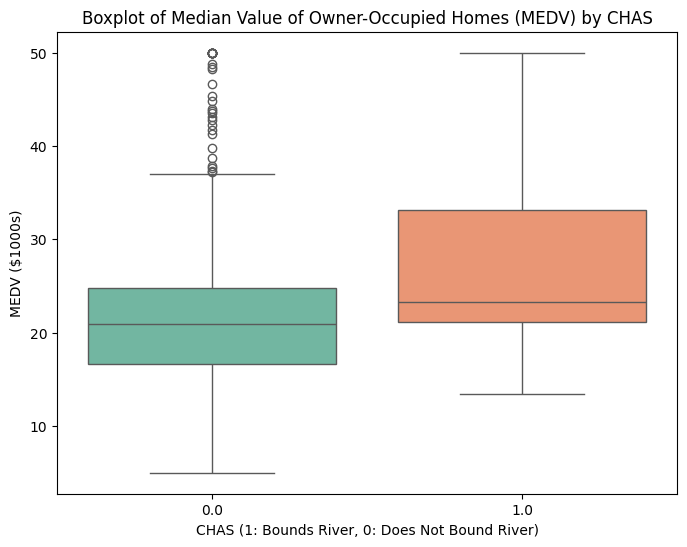

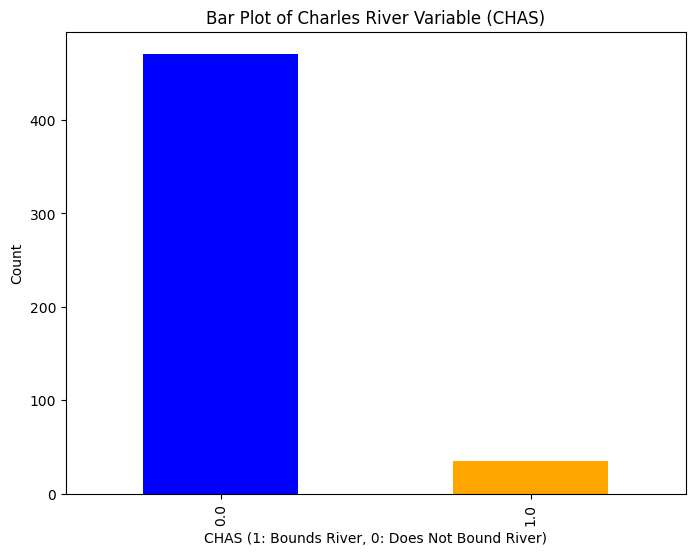

In [18]:
# TASK 2-1, 2-2, 3-1(The answer is in another cell below)

# 2-1: For the "Median value of owner-occupied homes" provide a boxplot
# 2-2: Provide a  bar plot for the Charles river variable

# Boxplot for MEDV by CHAS (Boxplot for Median value of owner-occupied homes (MEDV))
plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, x='CHAS', y='MEDV', hue='CHAS', dodge=False, palette='Set2', legend=False)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV) by CHAS')
plt.xlabel('CHAS (1: Bounds River, 0: Does Not Bound River)')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Bar plot for CHAS counts (Bar plot for Charles River variable (CHAS))
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1: Bounds River, 0: Does Not Bound River)')
plt.ylabel('Count')
plt.show()


In [19]:
# TASK 3-1

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Separate MEDV based on CHAS values (1: bounds river, 0: does not bound river)
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(chas_1, chas_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.113291312794837, P-value: 0.003567170098137517


# TASK 3-1 (Explanation)

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

-------------------------------------

Hypothesis

H0(null): There is no significant difference in median house values between houses bounded by the Charles River (CHAS = 1) and those that are not (CHAS = 0).

H1: There is a significant difference in median house values between these groups.

-------------------------------------

Test Used: Independent samples t-test

-------------------------------------

Results:

T-statistic: 3.113291312794837, P-value: 0.003567170098137517

-------------------------------------

Conclusion:

The p-value is less than the significance level (α=0.05), so we reject the null hypothesis(H0).
This indicates that there is a statistically significant difference in median house values 
between houses bounded by the Charles River and those that are not. 
Also the boxplot visually supports this conclusion, 
showing that houses near the Charles River tend to have higher median values.

> Houses near the Charles River tend to have different (likely higher) median values. 

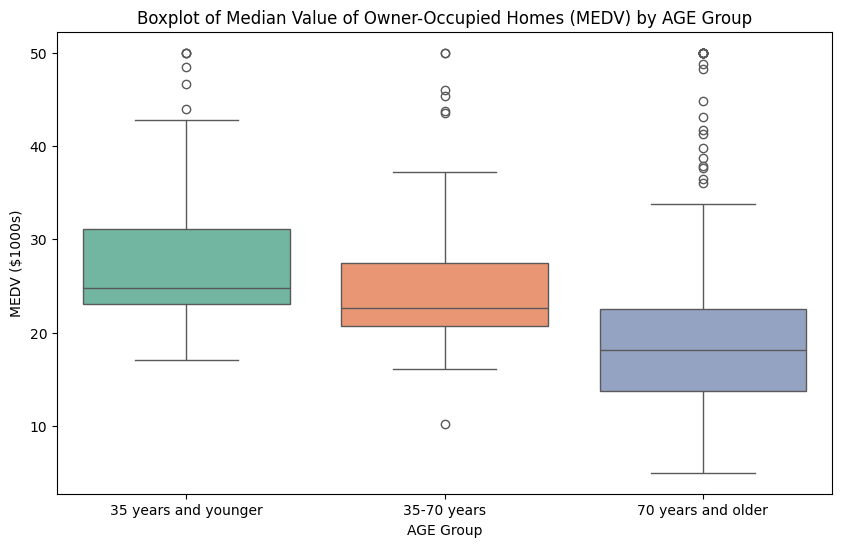

In [21]:
# TASK 2-3

# 2-3: Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

from scipy.stats import f_oneway

# Discretize AGE into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Extract MEDV values for each AGE group
medv_35_younger = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
medv_35_70 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
medv_70_older = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# Create a boxplot for MEDV across AGE groups 
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV', hue='AGE_group', dodge=False, palette='Set2', legend=False)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV) by AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

In [22]:
# TASK 3-2

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Perform ANOVA
f_stat, p_value = f_oneway(medv_35_younger, medv_35_70, medv_70_older)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


# TASK 3-2 (Explanation)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

-------------------------------------

Hypothesis

H0(null): There is no significant difference in the median house values (MEDV) across the three age groups (AGE_group).

H1: There is a significant difference in the median house values (MEDV) across the three age groups (AGE_group).

-------------------------------------

Test Used: ANOVA

To address this question, 
we used ANOVA (Analysis of Variance) to test 
if there is a significant difference in the median house values (MEDV) 
across three age groups:

-35 years and younger
-35–70 years
-70 years and older

-------------------------------------

Result:

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15

-------------------------------------

Conclusion: 

The p-value is much smaller than the significance level (α=0.05), so we reject the null hypothesis(H0).
This indicates that there is a statistically significant difference in the median house values (MEDV) across the three age groups.
The boxplot visually supports this conclusion:

>Houses in the "35 years and younger" group tend to have higher median values compared to older houses.
>Houses in the "70 years and older" group generally have the lowest median values.
>The "35–70 years" group falls between these two extremes.

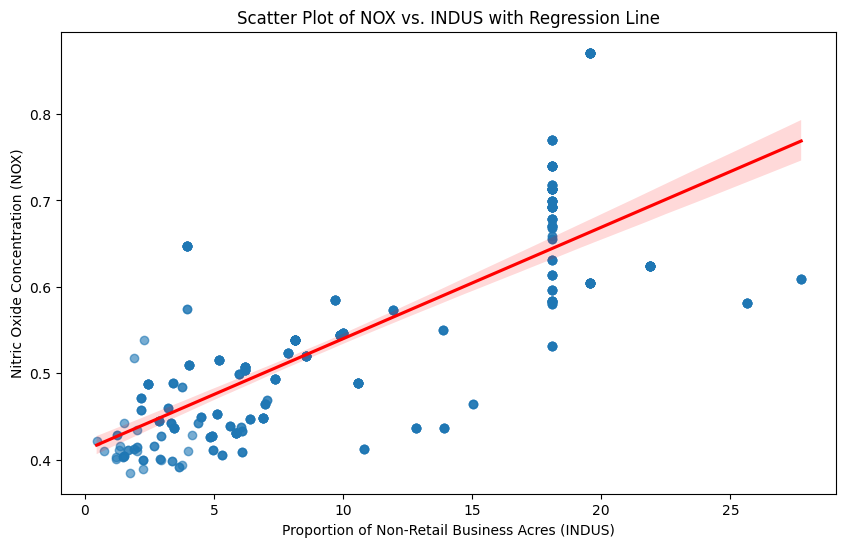

In [23]:
# TASK 2-4

# 2-4: Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town. What can you say about the relationship?

# Extract NOX and INDUS columns
nox = boston_df['NOX']
indus = boston_df['INDUS']

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=indus, y=nox, data=boston_df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Scatter Plot of NOX vs. INDUS with Regression Line')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

In [25]:
# TASK 3-3

# Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) 
# and the proportion of non-retail business acres per town (INDUS)?

from scipy.stats import pearsonr

# Extract NOX and INDUS columns
nox = boston_df['NOX']
indus = boston_df['INDUS']

# Perform Pearson Correlation Test
correlation, p_value = pearsonr(nox, indus)
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


# TASK 3-3 (Explanation)

Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)?

-------------------------------------

Hypothesis

H0(null): There is no linear relationship between NOX (Nitric oxide concentrations) and INDUS (proportion of non-retail business acres per town).

H1: There is a linear relationship between NOX and INDUS.

-------------------------------------

Test Used: Pearson Correlation Test

I performed the test to measure the strength and direction of the linear relationship between NOX and INDUS.
Also to visualizae the relationship, I used a scatter plot with a regression line.

-------------------------------------

Result: 

Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061238693e-98

-------------------------------------

Conclusion: 

>The correlation coefficient of 0.764 indicates a strong positive linear relationship between NOX and INDUS. 
>As the proportion of non-retail business acres (INDUS) increases, nitric oxide concentrations (NOX) also tend to increase.

The p-value is much smaller than the significance level (α=0.05), so we reject the null hypothesis.
>This confirms that there is a statistically significant linear relationship between NOX and INDUS.

The scatter plot with a regression line visually supports the correlation:
>The points generally follow an upward trend.
>The red regression line shows the positive linear relationship.

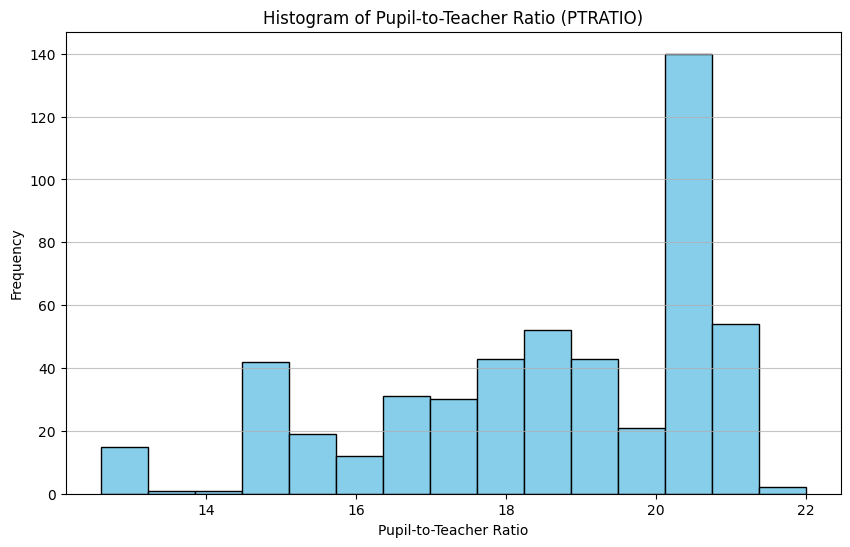

In [16]:
# TASK 2-5

# 2-5: Create a histogram for the pupil to teacher ratio variable (Histogram for PTRATIO)

# Create a histogram for PTRATIO
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Insights from the Histogram

Distribution Shape:

>The histogram shows a right-skewed distribution, with most towns having a PTRATIO around 20.
A smaller proportion of towns have lower PTRATIO values (e.g., below 16).

Key Observations:

>The majority of towns fall within a narrow range of PTRATIO values, indicating limited variability in this factor.
Towns with a higher PTRATIO may have fewer resources per student, which could negatively impact housing prices.

Intercept: 18.39008833049338
Coefficient: 1.0916130158411106
R-squared: 0.062464372121782796


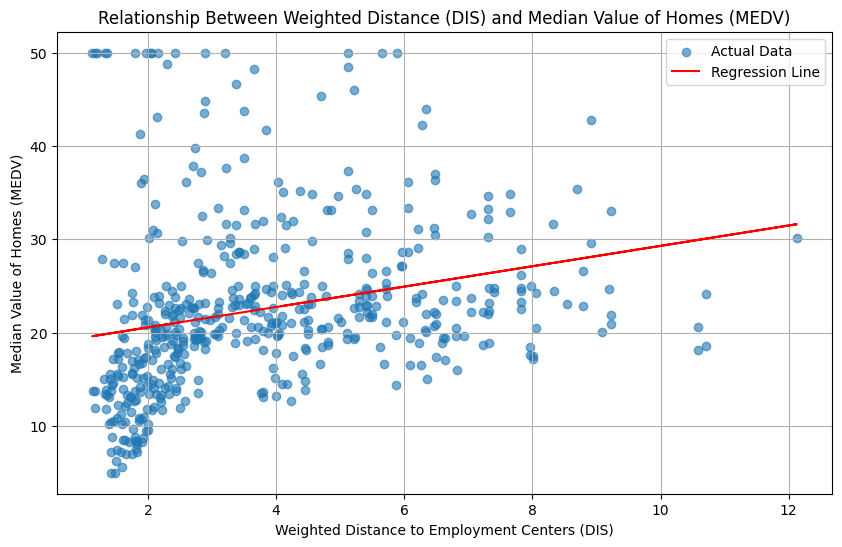

In [17]:
# TASK 3-4 

# What is the impact of an additional weighted distance to the five Boston employment centers (DIS) 
# on the median value of owner-occupied homes (MEDV)?

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df[['DIS']].values  # Reshape DIS to 2D array
y = boston_df['MEDV'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# Predict MEDV using the model
predictions = model.predict(X)

# Calculate R-squared value
r_squared = r2_score(y, predictions)

# Print results
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.title('Relationship Between Weighted Distance (DIS) and Median Value of Homes (MEDV)')
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.legend()
plt.grid(True)
plt.show()

# TASK 3-4 (Explanation)

What is the impact of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV)?

-------------------------------------

Test Used: Regression Analysis

I performed the test to measure the strength and direction of the linear relationship between NOX and INDUS.
Also to visualizae the relationship, I used a scatter plot with a regression line.

-------------------------------------

Result: 

Intercept: 18.39008833049338
Coefficient: 1.0916130158411106
R-squared: 0.062464372121782796

-------------------------------------

Interpretation:


1- Intercept(18.39): The intercept represents the predicted median house value (MEDV) when the weighted distance to employment centers (DIS) is zero. While DIS = 0 is not realistic in practice, this value serves as a baseline for the regression model.
The predicted median house value (MEDV) is approximately $18.39k when the weighted distance to employment centers (DIS) is zero.

2- Coefficient(1.09): For every additional unit increase in DIS, the median house value (MEDV) increases by approximately $1.09k. 
This suggests a weak positive relationship between distance from employment centers and house value.
Thus, houses farther from employment centers tend to have slightly higher median values, contrary to what might be expected.

3- R-squared(0.062): The R-squared value of 0.062 indicates that only about 6.2% of the variation in MEDV can be explained by DIS. This suggests that other factors likely have a stronger influence on house prices.

-------------------------------------

Conclusion: 

>While there is a slight positive relationship between DIS and MEDV, as indicated by the coefficient,
>this relationship is weak (low R-squared).
>Housing prices are likely influenced more by other factors such as crime rate (CRIM), room count (RM), or proximity to amenities.
